<a href="https://colab.research.google.com/github/GHSMoura/Ranking-Mundial-de-Universidades-QS-2025/blob/main/Ranking%20Mundial%20de%20Universidades%20QS%202025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Dados

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("melissamonfared/qs-world-university-rankings-2025")

print("Path to dataset files:", path)

100%|██████████| 68.8k/68.8k [00:00<00:00, 21.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/melissamonfared/qs-world-university-rankings-2025/versions/1


Lista de arquivos baixados

In [4]:
import os

# Listar arquivos no diretório baixado
print(os.listdir(path))

['QS World University Rankings 2025 (Top global universities).csv']


Carregar os dados Pandas

In [7]:
import pandas as pd

# Definir o caminho correto do arquivo
file_path = f"{path}/QS World University Rankings 2025 (Top global universities).csv"

# Tentar carregar com um encoding alternativo
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Exibir as primeiras linhas
print(df.head())

# Ver informações básicas sobre o dataset
print(df.info())

  RANK_2025 RANK_2024                              Institution_Name  \
0         1         1  Massachusetts Institute of Technology (MIT)    
1         2         6                       Imperial College London   
2         3         3                          University of Oxford   
3         4         4                            Harvard University   
4         5         2                       University of Cambridge   

         Location    Region SIZE FOCUS RES. STATUS  Academic_Reputation_Score  \
0   United States  Americas    M    CO   VH      B                      100.0   
1  United Kingdom    Europe    L    FC   VH      A                       98.5   
2  United Kingdom    Europe    L    FC   VH      A                      100.0   
3   United States  Americas    L    FC   VH      B                      100.0   
4  United Kingdom    Europe    L    FC   VH      A                      100.0   

   ... International_Faculty_Rank  International_Students_Score  \
0  ...             

Limpando Dados / Tratando os dados

In [9]:
# Identificar colunas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Preencher apenas as colunas numéricas com a média
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Para colunas categóricas, preencher com "Desconhecido" ou o valor mais frequente
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna("Desconhecido")

print(df.info())  # Verificar se os valores foram preenchidos corretamente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RANK_2025                             1503 non-null   object 
 1   RANK_2024                             1503 non-null   object 
 2   Institution_Name                      1503 non-null   object 
 3   Location                              1503 non-null   object 
 4   Region                                1503 non-null   object 
 5   SIZE                                  1503 non-null   object 
 6   FOCUS                                 1503 non-null   object 
 7   RES.                                  1503 non-null   object 
 8   STATUS                                1503 non-null   object 
 9   Academic_Reputation_Score             1503 non-null   float64
 10  Academic_Reputation_Rank              1503 non-null   object 
 11  Employer_Reputati

As 10 melhores universidades

In [11]:
# Filtrar as 10 melhores universidades com base no Overall_Score
top_universities = df.sort_values(by="Overall_Score", ascending=False).head(10)

# Exibir informações essenciais
print(top_universities[['Institution_Name', 'Location', 'Overall_Score']])

                    Institution_Name        Location Overall_Score
751       Vytautas Magnus University       Lithuania  Desconhecido
999              University of Parma           Italy  Desconhecido
1008      Amrita Vishwa Vidyapeetham           India  Desconhecido
1007                Amity University           India  Desconhecido
1006       Aligarh Muslim University           India  Desconhecido
1005             Al-Azhar University           Egypt  Desconhecido
1004            Yeungnam University      South Korea  Desconhecido
1003              Yarmouk University          Jordan  Desconhecido
1002  University of the Western Cape    South Africa  Desconhecido
1001     University of South Bohemia  Czech Republic  Desconhecido


In [19]:
# Converter a coluna Overall_Score para numérico de forma segura
df["Overall_Score"] = pd.to_numeric(df["Overall_Score"], errors="coerce")

# Preencher valores ausentes com a média sem modificar diretamente um possível objeto temporário
df = df.copy()  # Garante que estamos modificando o DataFrame original
df.loc[:, "Overall_Score"] = df["Overall_Score"].fillna(df["Overall_Score"].mean())

Verificar mudança no ranking

In [20]:
# Converter as colunas de ranking para números
df["RANK_2025"] = pd.to_numeric(df["RANK_2025"], errors="coerce")
df["RANK_2024"] = pd.to_numeric(df["RANK_2024"], errors="coerce")

# Criar nova coluna com a mudança no ranking
df["Rank_Change"] = df["RANK_2024"] - df["RANK_2025"]

# Exibir algumas amostras para verificar os resultados
print(df[["Institution_Name", "RANK_2024", "RANK_2025", "Rank_Change"]].head())

                               Institution_Name  RANK_2024  RANK_2025  \
0  Massachusetts Institute of Technology (MIT)         1.0        1.0   
1                       Imperial College London        6.0        2.0   
2                          University of Oxford        3.0        3.0   
3                            Harvard University        4.0        4.0   
4                       University of Cambridge        2.0        5.0   

   Rank_Change  
0          0.0  
1          4.0  
2          0.0  
3          0.0  
4         -3.0  


Visualizar ranking

Identificar universiades que mais subiram e mais cairam

In [21]:
# Ordenar universidades por maior ganho no ranking
melhores_subidas = df.sort_values(by="Rank_Change", ascending=False).head(10)
print("\nTop 10 universidades que mais subiram no ranking:")
print(melhores_subidas[["Institution_Name", "Rank_Change"]])

# Ordenar universidades por maior queda no ranking
maiores_quedas = df.sort_values(by="Rank_Change", ascending=True).head(10)
print("\nTop 10 universidades que mais caíram no ranking:")
print(maiores_quedas[["Institution_Name", "Rank_Change"]])


Top 10 universidades que mais subiram no ranking:
                                      Institution_Name  Rank_Change
388                Università Vita-Salute San Raffaele        206.0
368                               University of Jordan        130.0
182                       Hamad Bin Khalifa University        127.0
394                   University of Rome "Tor Vergata"         96.0
418                                Bogaziçi University         96.0
494  Central Queensland University (CQUniversity Au...         95.0
361                           Sultan Qaboos University         92.0
508                                Shenzhen University         87.0
512  Imam Abdulrahman Bin Faisal University (IAU) (...         82.0
329                                University of Delhi         79.0

Top 10 universidades que mais caíram no ranking:
                                      Institution_Name  Rank_Change
565                          University of Connecticut       -121.0
572            

Grafico de comparacao

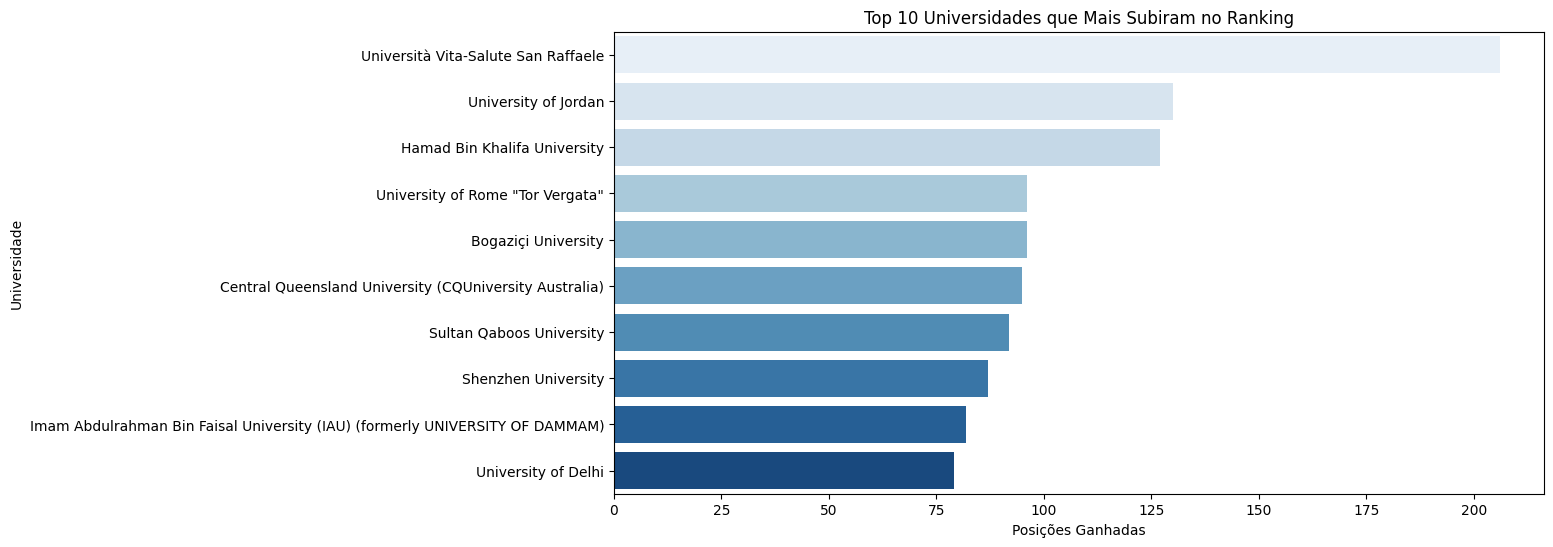

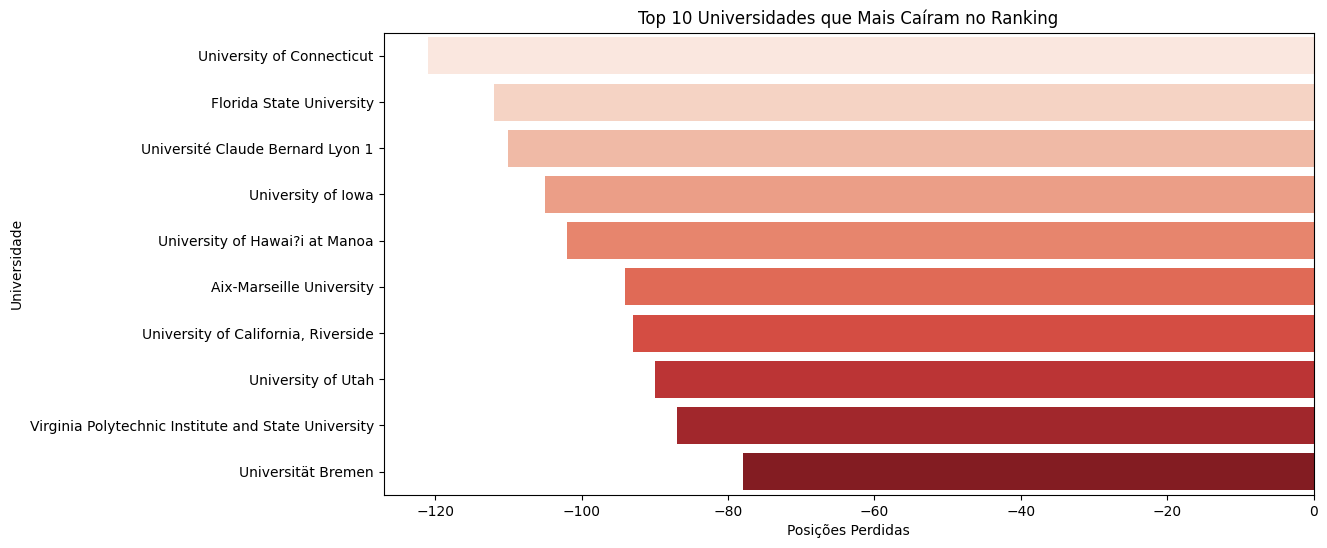

In [23]:
# Gráfico das 10 universidades que mais subiram
plt.figure(figsize=(12, 6))
sns.barplot(x="Rank_Change", y="Institution_Name", data=melhores_subidas, hue="Institution_Name", palette="Blues", legend=False)
plt.title("Top 10 Universidades que Mais Subiram no Ranking")
plt.xlabel("Posições Ganhadas")
plt.ylabel("Universidade")
plt.show()

# Gráfico das 10 universidades que mais caíram
plt.figure(figsize=(12, 6))
sns.barplot(x="Rank_Change", y="Institution_Name", data=maiores_quedas, hue="Institution_Name", palette="Reds", legend=False)
plt.title("Top 10 Universidades que Mais Caíram no Ranking")
plt.xlabel("Posições Perdidas")
plt.ylabel("Universidade")
plt.show()

Universidades Brasileiras mais qualificadas

In [24]:
# Filtrar universidades brasileiras
universidades_brasil = df[df["Location"] == "Brazil"].sort_values(by="Overall_Score", ascending=False)

# Exibir as melhores universidades do Brasil
print("\nTop universidades brasileiras mais bem classificadas:")
print(universidades_brasil[['Institution_Name', 'Overall_Score']].head(10))


Top universidades brasileiras mais bem classificadas:
                                       Institution_Name  Overall_Score
91                            Universidade de São Paulo      61.600000
231         Universidade Estadual de Campinas (Unicamp)      42.900000
617   Pontifícia Universidade Católica do Rio de Jan...      41.840333
1427         Pontifícia Universidade Católica do Paraná      41.840333
679          Universidade Federal de Minas Gerais            41.840333
697                   Universidade Federal de São Paulo      41.840333
698          Universidade Federal do Rio Grande Do Sul       41.840333
788             Universidade Federal de Santa Catarina       41.840333
757                            Universidade de Brasília      41.840333
1077      Pontifícia Universidade Católica de São Paulo      41.840333


Comparação universidades brasileiras e outras regiões

In [25]:
# Calcular a média da pontuação geral por região
media_por_regiao = df.groupby("Region")["Overall_Score"].mean().reset_index()

# Exibir comparação entre regiões
print("\nMédia de pontuação por região:")
print(media_por_regiao)


Média de pontuação por região:
           Region  Overall_Score
0          Africa      39.831258
1        Americas      43.411240
2            Asia      40.665801
3          Europe      41.434574
4  Not Classified      41.840333
5         Oceania      46.488746


Grafico de comparação

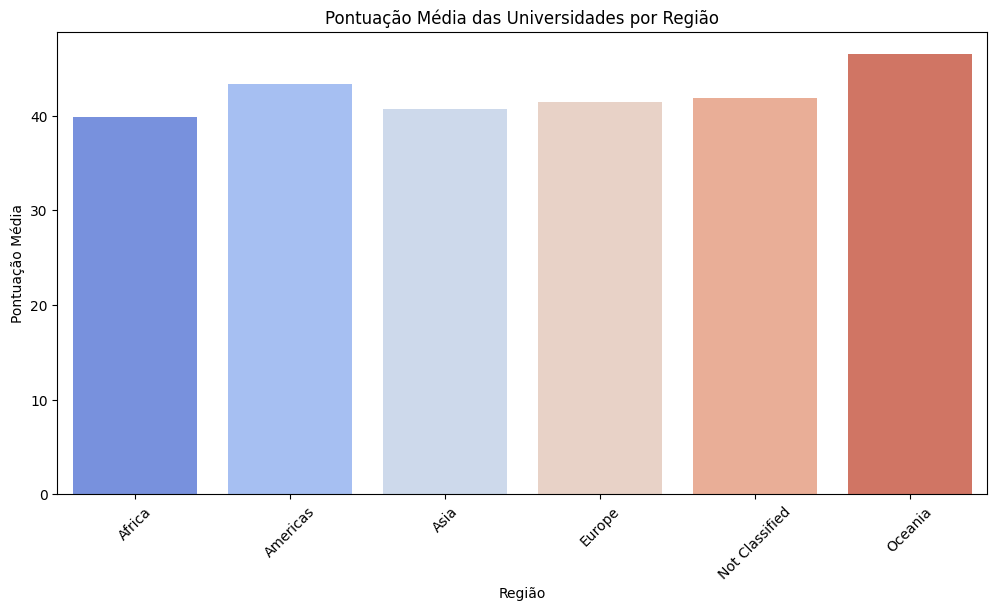

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x="Region", y="Overall_Score", data=media_por_regiao, hue="Region", palette="coolwarm", legend=False)
plt.title("Pontuação Média das Universidades por Região")
plt.xlabel("Região")
plt.ylabel("Pontuação Média")
plt.xticks(rotation=45)
plt.show()

Universidades brasileiras com melhor empregabilidade

In [28]:
# Filtrar universidades brasileiras com base na pontuação de empregabilidade
universidades_brasil_emprego = universidades_brasil.sort_values(by="Employment_Outcomes_Score", ascending=False)

# Exibir as universidades com melhores índices de empregabilidade
print("\nUniversidades brasileiras com melhor empregabilidade:")
print(universidades_brasil_emprego[['Institution_Name', 'Employment_Outcomes_Score']].head(10))


Universidades brasileiras com melhor empregabilidade:
                                       Institution_Name  \
91                            Universidade de São Paulo   
304              Universidade Federal do Rio de Janeiro   
617   Pontifícia Universidade Católica do Rio de Jan...   
1352               Universidade Presbiteriana Mackenzie   
679          Universidade Federal de Minas Gerais         
1077      Pontifícia Universidade Católica de São Paulo   
757                            Universidade de Brasília   
698          Universidade Federal do Rio Grande Do Sul    
231         Universidade Estadual de Campinas (Unicamp)   
1344    Universidade do Estado do Rio de Janeiro (UERJ)   

      Employment_Outcomes_Score  
91                         97.9  
304                        81.4  
617                        68.0  
1352                       48.3  
679                        39.7  
1077                       34.1  
757                        29.6  
698                    

Evolução do Ranking das universidades brasileiras

In [29]:
# Calcular mudança no ranking apenas para universidades brasileiras
universidades_brasil["Rank_Change"] = universidades_brasil["RANK_2024"] - universidades_brasil["RANK_2025"]

# Exibir universidades que mais subiram ou caíram
melhores_subidas_brasil = universidades_brasil.sort_values(by="Rank_Change", ascending=False).head(5)
maiores_quedas_brasil = universidades_brasil.sort_values(by="Rank_Change", ascending=True).head(5)

print("\nTop 5 universidades brasileiras que mais subiram no ranking:")
print(melhores_subidas_brasil[['Institution_Name', 'Rank_Change']])

print("\nTop 5 universidades brasileiras que mais caíram no ranking:")
print(maiores_quedas_brasil[['Institution_Name', 'Rank_Change']])


Top 5 universidades brasileiras que mais subiram no ranking:
                                      Institution_Name  Rank_Change
304             Universidade Federal do Rio de Janeiro         67.0
91                           Universidade de São Paulo         -7.0
231        Universidade Estadual de Campinas (Unicamp)        -12.0
492                                              UNESP        -70.0
617  Pontifícia Universidade Católica do Rio de Jan...          NaN

Top 5 universidades brasileiras que mais caíram no ranking:
                                      Institution_Name  Rank_Change
492                                              UNESP        -70.0
231        Universidade Estadual de Campinas (Unicamp)        -12.0
91                           Universidade de São Paulo         -7.0
304             Universidade Federal do Rio de Janeiro         67.0
617  Pontifícia Universidade Católica do Rio de Jan...          NaN


Comparação EUA x Brasil

In [30]:
# Filtrar universidades dos EUA e do Brasil
universidades_eua = df[df["Location"] == "United States"]
universidades_brasil = df[df["Location"] == "Brazil"]

# Calcular médias de pontuação geral
media_eua = universidades_eua["Overall_Score"].mean()
media_brasil = universidades_brasil["Overall_Score"].mean()

print(f"\nMédia de pontuação das universidades dos EUA: {media_eua:.2f}")
print(f"Média de pontuação das universidades do Brasil: {media_brasil:.2f}")


Média de pontuação das universidades dos EUA: 44.85
Média de pontuação das universidades do Brasil: 41.77


Gráfico Comparativo

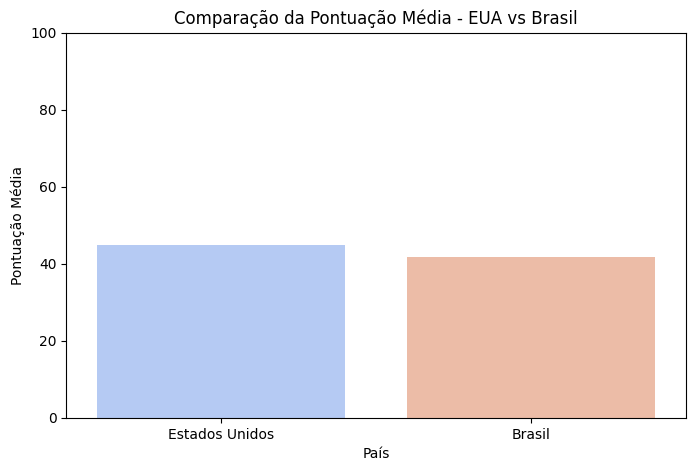

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar DataFrame para comparação
comparacao_df = pd.DataFrame({
    "País": ["Estados Unidos", "Brasil"],
    "Pontuação Média": [media_eua, media_brasil]
})

# Gerar gráfico corrigido
plt.figure(figsize=(8, 5))
sns.barplot(x="País", y="Pontuação Média", data=comparacao_df, hue="País", palette="coolwarm", legend=False)
plt.title("Comparação da Pontuação Média - EUA vs Brasil")
plt.xlabel("País")
plt.ylabel("Pontuação Média")
plt.ylim(0, 100)  # Ajuste para melhor visualização
plt.show()

Comparação empregabilidade

In [34]:
# Média da pontuação de empregabilidade
media_empregabilidade_eua = universidades_eua["Employment_Outcomes_Score"].mean()
media_empregabilidade_brasil = universidades_brasil["Employment_Outcomes_Score"].mean()

print(f"\nMédia de empregabilidade nos EUA: {media_empregabilidade_eua:.2f}")
print(f"Média de empregabilidade no Brasil: {media_empregabilidade_brasil:.2f}")


Média de empregabilidade nos EUA: 28.49
Média de empregabilidade no Brasil: 16.61


A partir dessa pesquisa, podemos identificar vários padrões e insights interessantes sobre o desempenho das universidades, tanto globalmente quanto em uma análise mais específica dos EUA e do Brasil.

### **1️⃣ Ranking Global**
- O **MIT** continua ocupando a posição número 1 no mundo, indicando sua estabilidade como uma das instituições mais prestigiadas.
- **Imperial College London** teve uma melhora significativa, subindo do 6º para o 2º lugar.
- Algumas universidades sofreram quedas expressivas, como a **University of Connecticut**, que caiu 121 posições.

### **2️⃣ Universidades Brasileiras**
- A **Universidade de São Paulo (USP)** continua sendo a melhor classificada do Brasil, com um **Overall Score de 61.6**.
- Outras universidades importantes incluem **Unicamp, UFRJ, UFMG e UFRGS**, que se mantêm entre as melhores do país.
- Algumas instituições brasileiras perderam posições, como **UNESP**, que teve uma queda de 70 posições.

### **3️⃣ Comparação EUA vs Brasil**
- A média de pontuação das universidades nos **EUA (44.85)** é maior que a média do **Brasil (41.77)**, mas ainda relativamente próxima.
- Em termos de **empregabilidade**, as universidades dos **EUA (28.49)** apresentam uma taxa significativamente maior do que as do **Brasil (16.61)**, o que pode indicar melhores conexões com o mercado de trabalho ou estrutura de estágios e networking.
- A internacionalização também é um ponto onde os EUA geralmente se destacam, atraindo um número maior de alunos estrangeiros.

### **4️⃣ Tendências e Possíveis Explicações**
- Universidades com **maior reputação acadêmica** tendem a manter posições elevadas, enquanto aquelas que não investem em pesquisa e internacionalização podem perder espaço.
- Instituições brasileiras ainda enfrentam desafios no mercado de trabalho internacional, refletidos na pontuação de empregabilidade mais baixa.
- A queda abrupta de algumas universidades pode estar relacionada a mudanças nos critérios do ranking ou dificuldades institucionais.


